In [67]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib.axes as ax
dataframe = pd . read_csv ("breast-cancer-wisconsin.data.txt")

In [3]:
X = dataframe.loc[:, "Marginal_Adhesion":"Single_Epithelial_Cell_Size"]

In [21]:
label = dataframe.loc[:, "label"]
y = [0 if i == 2 else 1 for i in label]

In [22]:
X

,Marginal_Adhesion,Single_Epithelial_Cell_Size
0,1,2
1,5,7
2,1,2
3,1,3
4,3,2
...,...,...
694,1,3
695,1,2
696,3,7
697,4,3


In [37]:
y

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,


In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, stratify = y)

# Klassifikatoren

In [92]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

In [93]:
def plot_prec_rec_threshhold(precision, recall, threshholds):
    plt.plot(precision, recall)
    plt.xlabel("precision")
    plt.ylabel("recall")
    plt.show()

    plt.plot(threshholds, precision[:-1], 'g')
    plt.plot(threshholds, recall[:-1], 'r')
    plt.legend("precision", "recall")
    plt.xlabel("thresshold")
    # plt.ylabel("precision")
    plt.show()

    # line1, = ax.Axes.plot(threshholds, precision[:-1], label="precition")
    # line2, = ax.Axes.plot(threshholds, recall[:-1], label="recall",)
    # ax.Axes.legend(handles=[line1, line2])
    # plt.plot(threshholds, recall[:-1])
    # plt.xlabel("thresshold")
    # plt.ylabel("recall")
    # plt.show()

# KNN

score:  0.9071428571428571


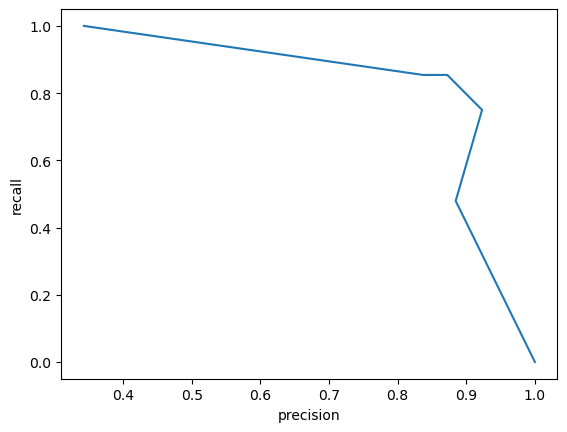

/tmp/ipykernel_1602/928133345.py:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("precision", "recall")


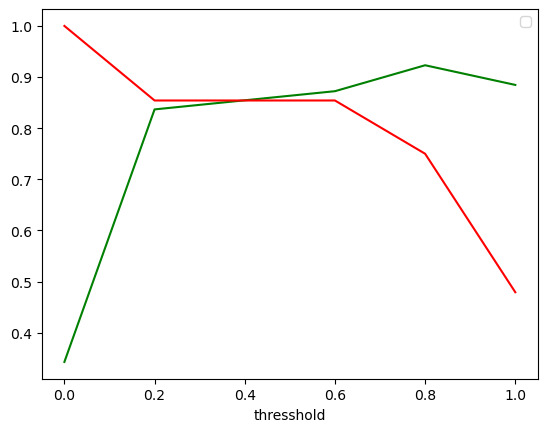

[[86  6]
 [ 7 41]]
[[84  8]
 [ 7 41]]


In [116]:
from sklearn.neighbors import KNeighborsClassifier

cl =KNeighborsClassifier()
cl.fit(x_train, y_train)
print("score: ", cl.score(x_test, y_test))
precision, recall, threshholds = precision_recall_curve(y_test, cl.predict_proba(x_test)[:, 1])
plot_prec_rec_threshhold(precision, recall, threshholds)
y_pred = cl.predict(x_test)
print(confusion_matrix(y_test, y_pred))

# print(cl.predict_proba(x_test))

y_pred = (cl.predict_proba(x_test)[:,1] >= 0.05).astype(bool)
print(confusion_matrix(y_test, y_pred))

# Random Forrest

score:  0.9


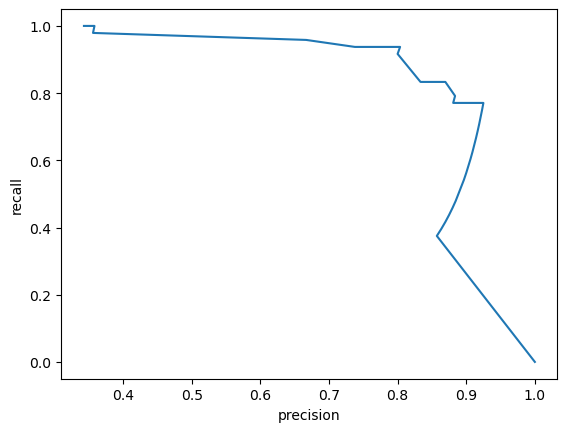

/tmp/ipykernel_1602/928133345.py:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("precision", "recall")


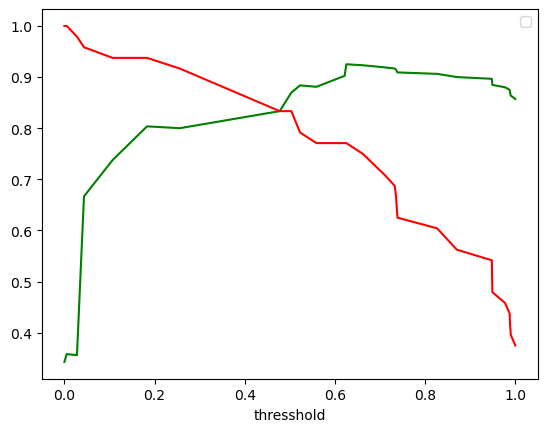

[[86  6]
 [ 8 40]]
[[76 16]
 [ 3 45]]


In [119]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier()
cl.fit(x_train, y_train)
print("score: ", cl.score(x_test, y_test))
precision, recall, threshholds = precision_recall_curve(y_test, cl.predict_proba(x_test)[:, 1])
plot_prec_rec_threshhold(precision, recall, threshholds)
y_pred = cl.predict(x_test)
print(confusion_matrix(y_test, y_pred))

y_pred = (cl.predict_proba(x_test)[:,1] >= 0.05).astype(bool)
print(confusion_matrix(y_test, y_pred))

# SVC

score:  0.9


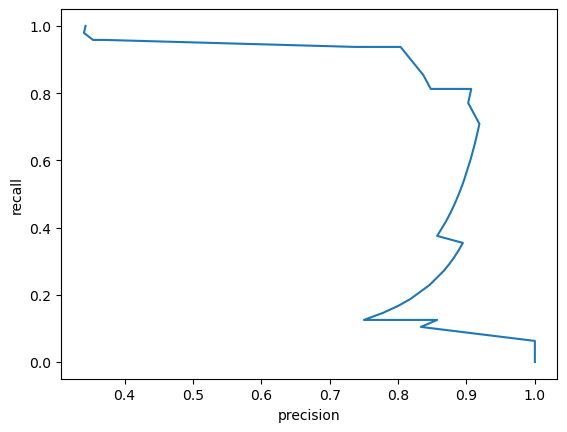

/tmp/ipykernel_1602/928133345.py:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("precision", "recall")


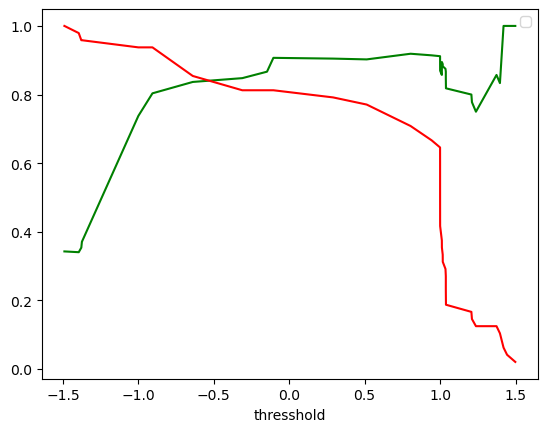

array([[76, 16],
       [ 3, 45]])

In [107]:
from sklearn.svm import SVC
cl = SVC()
cl.fit(x_train, y_train)
print("score: ", cl.score(x_test, y_test))
precision, recall, threshholds = precision_recall_curve(y_test, cl.decision_function(x_test))
plot_prec_rec_threshhold(precision, recall, threshholds)

y_pred = cl.predict(x_test)
confusion_matrix(y_test, y_pred)

y_pred = cl.decision_function(x_test) > -1.35
confusion_matrix(y_test, y_pred)